In [1]:
# Libraries
import numpy as np #numerical computations
import pandas as pd  #data manipulation

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1828,ham,May i call You later Pls,NaN,NaN,NaN
3776,spam,"Mila, age23, blonde, new in UK. I look sex wit...",NaN,NaN,NaN
4617,ham,Nvm... I'm going to wear my sport shoes anyway...,NaN,NaN,NaN
1674,ham,Nah dub but je still buff,NaN,NaN,NaN
3055,ham,Webpage s not available!,NaN,NaN,NaN
964,ham,Are you this much buzy,NaN,NaN,NaN
1717,spam,WOW! The Boys R Back. TAKE THAT 2007 UK Tour. ...,NaN,NaN,NaN
197,ham,is your hamster dead? Hey so tmr i meet you at...,NaN,NaN,NaN
1665,ham,Dunno cos i was v late n when i reach they ins...,NaN,NaN,NaN
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,NaN,NaN,NaN


In [4]:
#checks the dimension of dataframe
df.shape

(5572, 5)

In [5]:
!pip install imbalanced-learn
!python -m pip install --upgrade pip

In [6]:
# Enhanced Text Preprocessing
import string
import nltk
import re
import pandas as pd # Make sure pandas is imported if not already in an earlier cell
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # Corrected import for PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier # New: Import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle # To save models

# Ensure necessary NLTK resources are downloaded (good to run once at the start of notebook)
nltk.download('punkt', quiet=True) # Added quiet=True
nltk.download('stopwords', quiet=True) # Added quiet=True

ps = PorterStemmer() # Corrected spelling for PorterStemmer instance

# --- Updated Preprocessing Function ---
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        # Handle URLs: Replace with a special token
        if re.match(r'https?://\S+|www\.\S+|\S+\.(com|net|org|co|uk|in|info|biz)', i):
            y.append(' _URL_ ')
        # Handle numbers/currency: Replace large numbers or those with currency with a token
        elif re.match(r'(£|\$|€)\d+|\d{3,}', i): # Detects £, $, €, or numbers with 3+ digits
            y.append(' _NUM_ ')
        # Handle email addresses: Basic email pattern detection
        elif re.match(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', i):
            y.append(' _EMAIL_ ')
        elif i.isalnum(): # Keeps only alphanumeric characters otherwise
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# --- Apply the transformed text function ---
# Assuming 'df' DataFrame and 'v2' column are loaded in an earlier cell.
# And 'v1' is mapped to 'target' (0 for ham, 1 for spam)
df['transformed_message'] = df['v2'].apply(transform_text) # Apply to 'v2' as in your original code

# --- Feature Extraction with TF-IDF (using 'transformed_message') ---
tfidf = TfidfVectorizer(max_features=3000) # You can adjust max_features
X = tfidf.fit_transform(df['transformed_message']).toarray()
y = df['v1'].map({'ham': 0, 'spam': 1}).values # Assuming 'v1' is the label column

# --- Handling class imbalance using SMOTE (as in your original code) ---
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42) # Added random_state for reproducibility
X_res, y_res = smote.fit_resample(X, y)

# --- Model Training with ExtraTreesClassifier ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier # Using ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # More comprehensive metrics

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res) # Added stratify

# Initialize ExtraTreesClassifier (no GridSearchCV needed initially, but you can add it)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all CPU cores

print("Training Extra Trees Classifier...")
et_model.fit(X_train, y_train)

# --- Model Evaluation ---
y_pred_et = et_model.predict(X_test)

print("\n--- Extra Trees Classifier Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_et))
print("Precision:", precision_score(y_test, y_pred_et))
print("Recall:", recall_score(y_test, y_pred_et))
print("F1-Score:", f1_score(y_test, y_pred_et))

# --- Save the Trained Model and Vectorizer ---
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(et_model, open('model.pkl', 'wb')) # Save the trained ExtraTreesClassifier
print("\nNew 'vectorizer.pkl' and 'model.pkl' (ExtraTreesClassifier) saved successfully!")

Training Extra Trees Classifier...

--- Extra Trees Classifier Results ---
Accuracy: 0.9979274611398964
Precision: 0.9989615784008308
Recall: 0.9968911917098445
F1-Score: 0.9979253112033195

New 'vectorizer.pkl' and 'model.pkl' (ExtraTreesClassifier) saved successfully!


In [7]:
# 1.Data Cleaning
# 2.EDA(Exploratory Data Analysis)
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6>Improvements
# 7.website
# 8.Deploy


1.Data Cleaning

In [8]:
#quick summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   v1                   5572 non-null   object
 1   v2                   5572 non-null   object
 2   Unnamed: 2           50 non-null     object
 3   Unnamed: 3           12 non-null     object
 4   Unnamed: 4           6 non-null      object
 5   transformed_message  5572 non-null   object
dtypes: object(6)
memory usage: 261.3+ KB


In [9]:
#print the cols available in DataFrame
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'transformed_message'],
      dtype='object')


In [10]:
#inplace=True means it modifies the original DataFrame directly, rather than returning a new one.
cols_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
print("Dropped completely")

Dropped completely


In [11]:
print(df.columns)

Index(['v1', 'v2', 'transformed_message'], dtype='object')


In [12]:
df.sample(5)

,v1,v2,transformed_message
3281,ham,Hey you around? I've got enough for a half + t...,hey around got enough half ten owe
916,ham,Was actually about to send you a reminder toda...,actual send remind today wonder weekend
704,ham,True dear..i sat to pray evening and felt so.s...,true dear sat pray even felt sm time
3184,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,mayb woke fuck 3 would problem
904,ham,"We're all getting worried over here, derek and...",get worri derek taylor alreadi assum worst


In [13]:
#renaming the cols
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text,transformed_message
4052,ham,I was slept that time.you there?,slept
45,ham,No calls..messages..missed calls,call messag miss call
1788,ham,Arun can u transfr me d amt,arun u transfr amt
4696,ham,"Okey dokey, iÛ÷ll be over in a bit just sorti...",okey dokey bit sort stuff
3239,ham,A cute thought for friendship: \Its not necess...,cute thought friendship necessari share everi ...


In [14]:
#sklearn for encode catergorical data into numerical
#labelencoder is method used for changing catergorical to numerical 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['Target']=encoder.fit_transform(df['Target'])

In [16]:
#ham --->0
#spam--->1
df.head()

,Target,Text,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [17]:
#missing values
#checks the NaN values in entire dataFRame
df.isnull().sum()

Target                 0
Text                   0
transformed_message    0
dtype: int64

In [18]:
#check for duplicate values
df.duplicated().sum()

403

In [19]:
df.shape

(5572, 3)

In [20]:
#remove all duplicates
#.drop_duplicates(): A method used to remove duplicate rows
#keep='first':
#Keeps the first occurrence of a duplicate row.
#All subsequent duplicate rows are dropped.
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 3)

2.EDA--->to understand more about data before doing modeling or prediction

In [23]:
df.head()

,Target,Text,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [24]:
#understand the distribution--->counts how many times unquie value appears in Targetcolumn
df['Target'].value_counts()


Target
0    4516
1     653
Name: count, dtype: int64

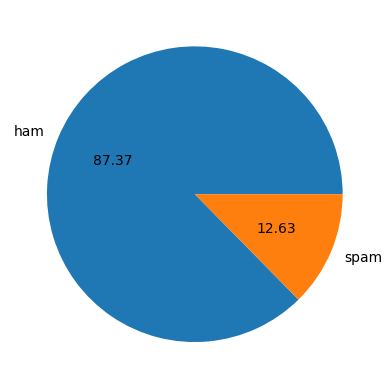

In [25]:
#matplotlib lib-->creating visualizations lk plots and charts
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
#nltk--->natural language toolkit
import nltk

In [27]:
!pip install nltk

In [28]:
#punkt-->tokenizer model from nltk library..helps nltk split text into sentences or words
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
#df['num_characters']: A new column that will store the length of each SMS message (in characters)
df['num_characters']=df['Text'].apply(len)

In [30]:
df.head()

,Target,Text,transformed_message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61


In [31]:
#no of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,transformed_message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61,15


In [32]:
#no of sentences
df['num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,transformed_message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24,2
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61,15,1


In [33]:
#summary
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#ham
df[df['Target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['Target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
#seaborn--->It provides a high-level API for drawing attractive and informative statistical graphics.
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

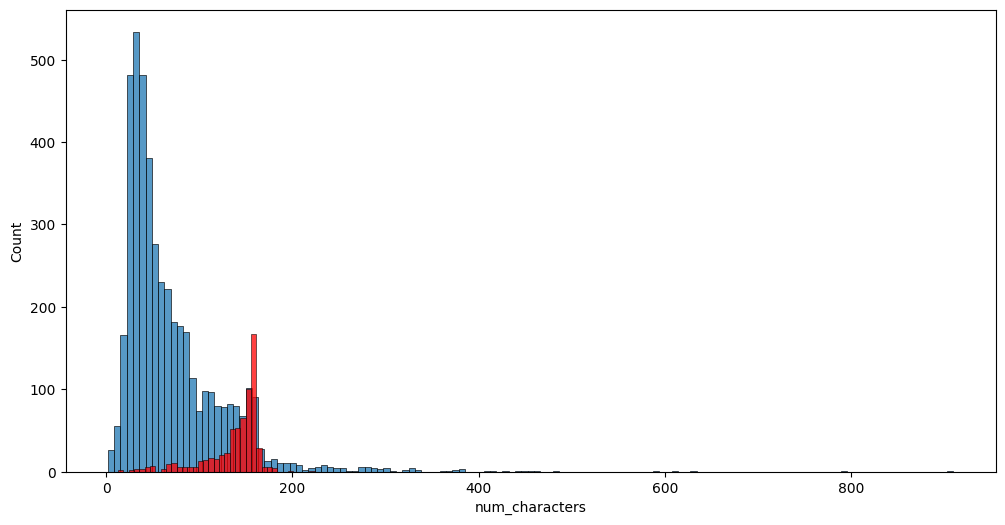

In [37]:
#plot for num_characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

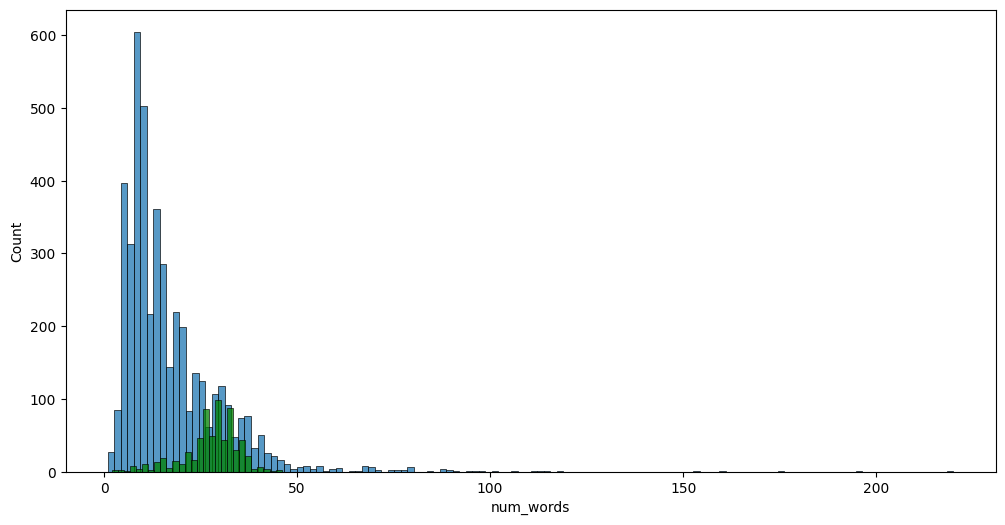

In [38]:
#plot for num_words
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='green')

<Axes: xlabel='num_sentence', ylabel='Count'>

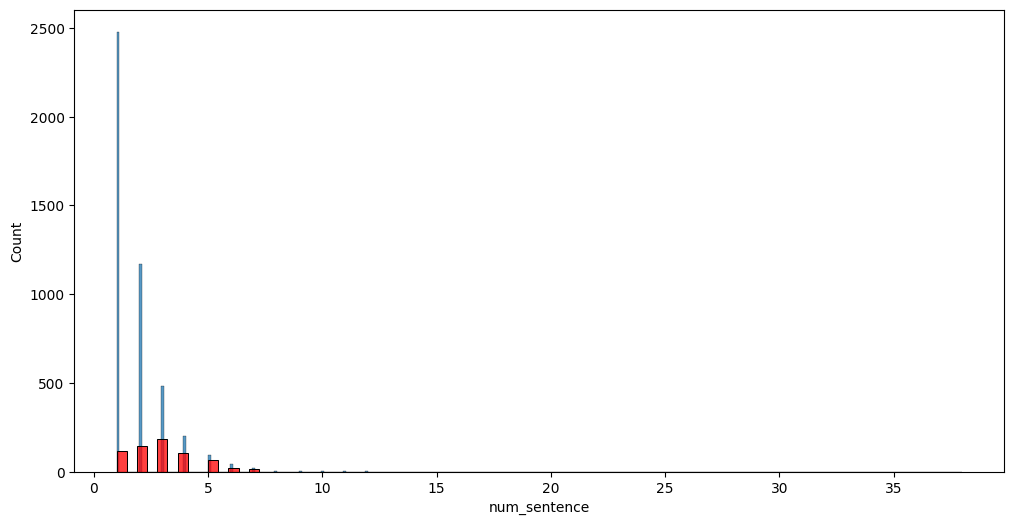

In [39]:
#plot for num_sentences
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_sentence'])
sns.histplot(df[df['Target']==1]['num_sentence'],color='red')

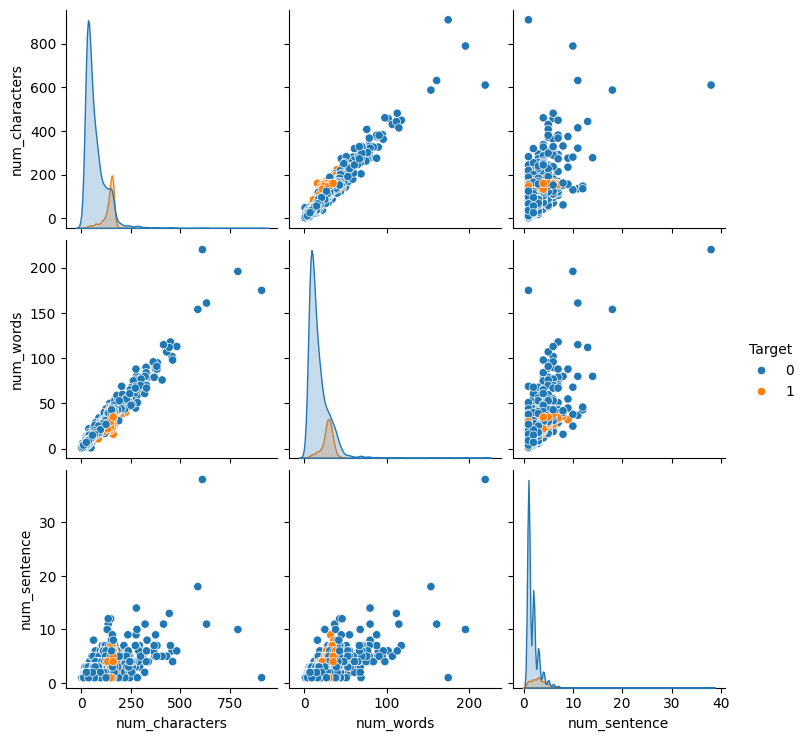

In [40]:
#pairplot--->creates  grid of scatter plots to show pairwise r/s b/w the numeric cols in df
sns.pairplot(df,hue='Target')

<Axes: >

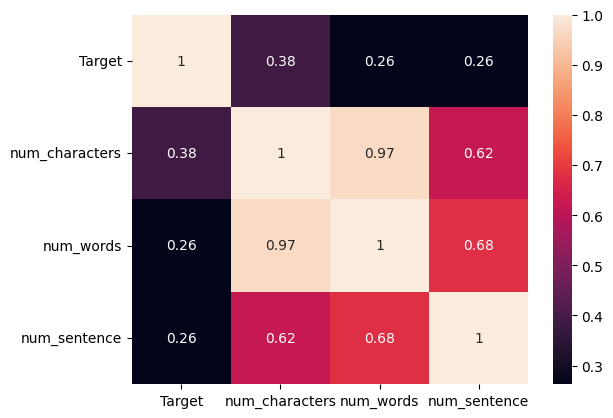

In [41]:
#correaltion
#df.corr()
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)


3.Data Preprocessing
 --Lowercase
--Tokenization
--Removing Special Characters
--Removing stop words and punctuation
--Stemming


In [42]:
#Lowercase
def Transform_text(Text):
    text=Text.lower()
    return text

In [43]:
Transform_text('Hi how are you')

'hi how are you'

In [44]:
#Toeknization
def Transform_text(Text):
    text=nltk.word_tokenize(Text)
    return text

In [45]:
Transform_text('Hi how are you')

['Hi', 'how', 'are', 'you']

In [46]:
#removig spl characters
#df['Text'][10]
def Transform_text(Text):
    text=nltk.word_tokenize(Text)
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
    text=y
    y.clear()
            
    return y

In [47]:
Transform_text('Hi how are you..You have scored 85%%')

[]

In [48]:
#removing stop words and punctuation
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
def Transform_text(Text):
    text=nltk.word_tokenize(Text)
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [51]:
Transform_text('Hi, are you Training Machine learning model?')

['Hi', 'Training', 'Machine', 'learning', 'model']

In [52]:
#stemming
#porterStemmer---> is a alg that is used to reduce a word to its root or base form.
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [53]:
def Transform_text(Text):
    text=nltk.word_tokenize(Text)
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    return y

In [54]:
Transform_text('I liked your Presentation on ML!')

'i like your present on ml'

In [55]:
df['transformed_text']=df['Text'].apply(Transform_text)

In [56]:
df.head()

,Target,Text,transformed_message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61,15,1,nah i do think he goe to usf he live around he...


In [57]:
#The wordcloud library is a popular Python package used to generate word clouds from text data.
 ##A word cloud is a visual representation of word frequency — where:
####More frequent words appear larger and bolder.
####It's used to quickly visualize the most common words in a body of text.

!pip install wordcloud

In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
#.str.cat(sep=" ")
#This concatenates all the text entries in the 'transformed_text' column into one big string, separating them by a space.
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

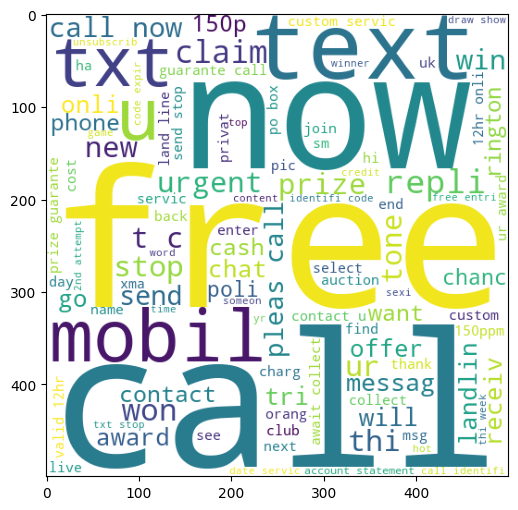

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [61]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

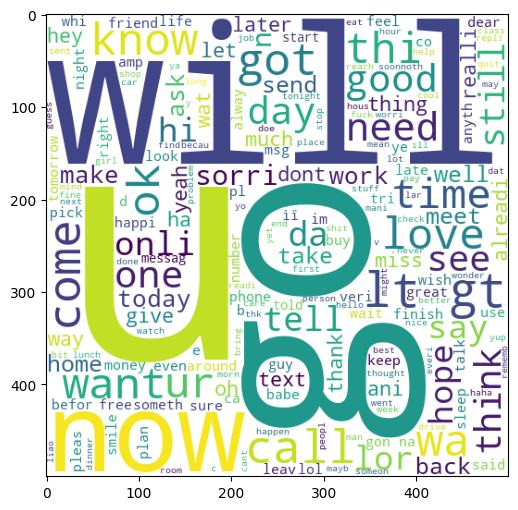

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [63]:
df.head()

,Target,Text,transformed_message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61,15,1,nah i do think he goe to usf he live around he...


In [64]:
#top words in spam
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [65]:
len(spam_corpus)

14555

In [66]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('to', 595),
 ('a', 331),
 ('call', 320),
 ('you', 267),
 ('your', 252),
 ('free', 191),
 ('for', 183),
 ('the', 183),
 ('now', 164),
 ('2', 157),
 ('or', 157),
 ('is', 144),
 ('txt', 141),
 ('text', 122),
 ('u', 122),
 ('from', 122),
 ('on', 121),
 ('ur', 119),
 ('have', 116),
 ('mobil', 114),
 ('and', 104),
 ('stop', 104),
 ('repli', 103),
 ('4', 99),
 ('claim', 98),
 ('with', 94),
 ('prize', 82),
 ('thi', 82),
 ('of', 81),
 ('our', 77)]

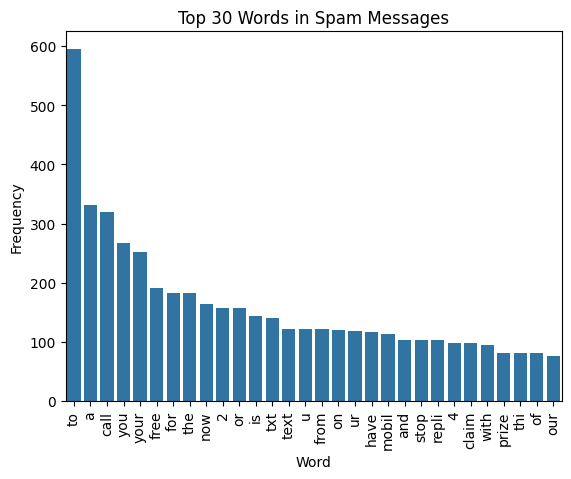

In [67]:
from collections import Counter
word_freq=Counter(spam_corpus).most_common(30)
df_top_words=pd.DataFrame(word_freq,columns=['Word','Frequency'])
sns.barplot(x='Word', y='Frequency', data=df_top_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.show()

In [68]:
#top words in ham
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [69]:
len(ham_corpus)

62881

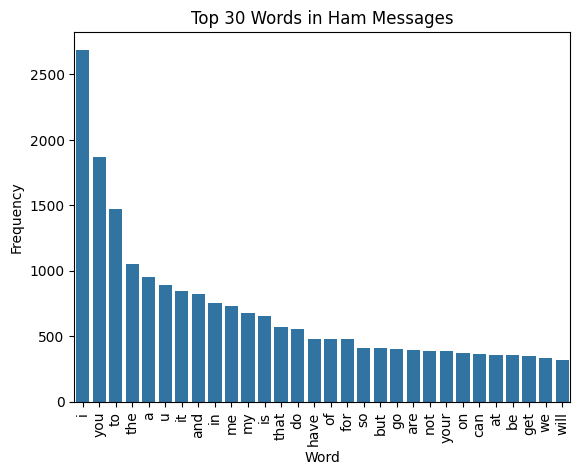

In [70]:
from collections import Counter
word_freq=Counter(ham_corpus).most_common(30)
df_top_words=pd.DataFrame(word_freq,columns=['Word','Frequency'])
sns.barplot(x='Word', y='Frequency', data=df_top_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Ham Messages")
plt.show()

4. Model Building (Naive Bayes)

In [71]:
#bag of words
#vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [72]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [73]:
X.shape

(5169, 6839)

In [74]:
y=df['Target'].values

In [75]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
gnb=GaussianNB()
nmb=MultinomialNB()
bnb=BernoulliNB()

In [80]:
#Gaussian NB
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8887814313346228
[[801  95]
 [ 20 118]]
0.5539906103286385


In [81]:
#Multinomial NB
nmb.fit(X_train,y_train)
y_pred2=nmb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[875  21]
 [ 12 126]]
0.8571428571428571


In [82]:
#Bernoulii NB
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
[[893   3]
 [ 23 115]]
0.9745762711864406


In [83]:
##Another Model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)


In [84]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [85]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(X)

In [87]:
#appendening the num_charcacters col to X
#reshape(-1,1)-->converts the series into 2D array with col.
#np.stack()-->horizontally stacks the new col to Tf-IDF feature.
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [88]:
X

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [89]:
X.shape

(5169, 3001)

In [90]:
y=df['Target'].values

In [91]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [95]:
nmb=MultinomialNB()
bnb=BernoulliNB()

In [96]:
!pip install xgboost

In [97]:
#Tfidf
#Multinomial NB
#coz precision score is better than gnb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [99]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [100]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [101]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [102]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  NB
Accuracy -  0.9439071566731141
Precision -  1.0
For  DT
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563
For  LR
Accuracy -  0.9690522243713733
Precision -  0.9568965517241379
For  RF
Accuracy -  0.9748549323017408
Precision -  1.0
For  AdaBoost
Accuracy -  0.9564796905222437
Precision -  0.9345794392523364
For  BgC
Accuracy -  0.971953578336557
Precision -  0.936
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.96875
For  xgb
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461


In [103]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [104]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.943907,1.000000
5,RF,0.974855,1.000000
8,ETC,0.978723,0.975410
9,GBDT,0.953578,0.968750
4,LR,0.969052,0.956897
10,xgb,0.978723,0.946154
7,BgC,0.971954,0.936000
6,AdaBoost,0.956480,0.934579
3,DT,0.952611,0.932039
1,KN,0.936170,0.846154


In [105]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.943907
1,RF,Accuracy,0.974855
2,ETC,Accuracy,0.978723
3,GBDT,Accuracy,0.953578
4,LR,Accuracy,0.969052
5,xgb,Accuracy,0.978723
6,BgC,Accuracy,0.971954
7,AdaBoost,Accuracy,0.956480
8,DT,Accuracy,0.952611
9,KN,Accuracy,0.936170


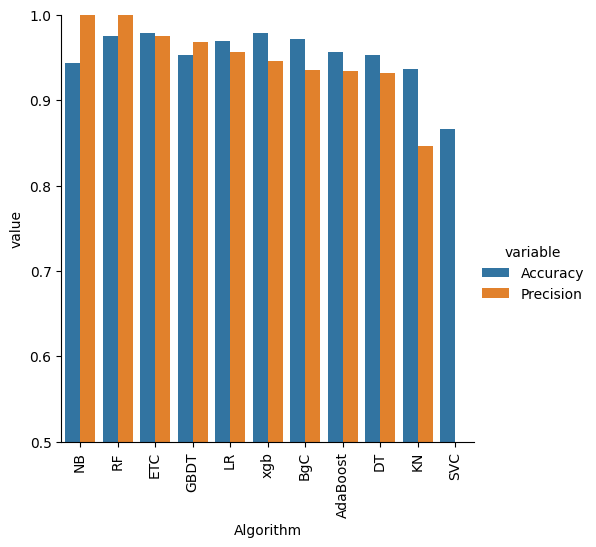

In [106]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [107]:
#model Improve
#1.change the max_feature of Tfidf

In [108]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [109]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [110]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [111]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [112]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [113]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.943907,1.000000,0.943907,1.000000,0.943907,1.000000,0.943907,1.000000
1,RF,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
3,GBDT,0.953578,0.968750,0.953578,0.968750,0.953578,0.968750,0.953578,0.968750
4,LR,0.969052,0.956897,0.969052,0.956897,0.969052,0.956897,0.969052,0.956897
5,xgb,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
6,BgC,0.971954,0.936000,0.971954,0.936000,0.971954,0.936000,0.971954,0.936000
7,AdaBoost,0.956480,0.934579,0.956480,0.934579,0.956480,0.934579,0.956480,0.934579
8,DT,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039
9,KN,0.936170,0.846154,0.936170,0.846154,0.936170,0.846154,0.936170,0.846154


In [114]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [115]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [116]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [117]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9400386847195358
Precision 1.0


In [118]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [119]:
from sklearn.ensemble import StackingClassifier

In [120]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [121]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))
import time
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Time taken:", time.time() - start)


Accuracy 0.9796905222437138
Precision 0.9333333333333333
Time taken: 291.7913956642151


In [122]:
# import pickle
# # Example dataset
# X = ["free money", "hi how are you", "you won a prize", "hello friend"]
# y = [1, 0, 1, 0]  # 1 = spam, 0 = not spam

# # Preprocess & vectorize
# tfidf = TfidfVectorizer()
# X_vec = tfidf.fit_transform(X)

# # Train model
# model = MultinomialNB()
# model.fit(X_vec, y)

# # Save the fitted model and vectorizer
# pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
# pickle.dump(model, open("model.pkl", "wb"))